In [20]:
from scipy import stats

theta_values = np.linspace(0.005, 0.995, 100)
sample_size = 100
iter = 1000
ci_percentages = []
for theta in theta_values:
    count = 0
    for _ in range(iter):
        sample = np.random.binomial(1, theta, sample_size)
        sample_mean = np.mean(sample)
        sample_std = np.sqrt(sample_mean * (1 - sample_mean))

        z_score = stats.norm.ppf(1 - 0.05/2)
        margin_error = z_score * (sample_std / np.sqrt(sample_size))
        lower_bound = sample_mean - margin_error
        upper_bound = sample_mean + margin_error

        if(lower_bound <= theta <= upper_bound):
            count += 1
    ci_percentages.append(count/iter)


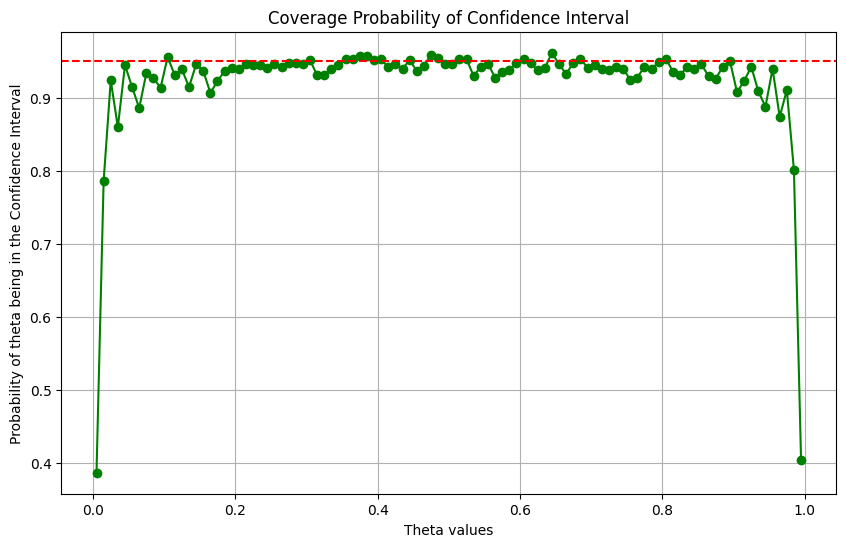

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(theta_values, ci_percentages, color='g', marker='o')
plt.axhline(y=1 - alpha, color='r', linestyle='--', label=f'Nominal {1 - alpha} Level')
plt.xlabel("Theta values")
plt.ylabel("Probability of theta being in the Confidence Interval")
plt.title('Coverage Probability of Confidence Interval')
plt.grid()